# House Price Prediction

In [ ]:
import numpy as np
import pandas as pd
import sklearn.preprocessing

In [ ]:
data_set = pd.read_csv('Housing.csv')


In [ ]:
print (data_set)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
print (data_set.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
data_set.shape

(545, 13)

In [ ]:
data_set.isnull().sum()*100/data_set.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [ ]:

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


def binary_map(x):
    return x.map({'yes': 1, "no": 0})

data_set[varlist] = data_set[varlist].apply(binary_map)

In [ ]:
data_set.head

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0                1        2         1   
1           0                0                1        3         0   
2           1                0                0        2         1   
3           1                0                1        3         1   
4           1                0                1        2         0   
..        ...              ...              ...      ...       ...   
540         1                0                0        2         0   
541         0                0                0        0         0   
542         0                0                0        0         0   
543         0                0                0        0         0   
544         0                0                0        0         0   

    furnishingstatus  
0          furnished  
1          furnished  
2     semi-furnished  
3          furnished  
4          furnished  
..               ...  
540      unfurnished  
541   semi-furnished  
542      unfurnished  
543        furnished  
544      unfurnished  

[545 rows x 13 columns]>

In [ ]:
list_of_column_names = list(data_set.columns)


print('List of column names : ',
      list_of_column_names)

List of column names :  ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


# one hot encoding

In [ ]:
data_set_clmn_last = pd.get_dummies(data_set['furnishingstatus'], drop_first = True)



In [ ]:
data_set_clmn_last.head

<bound method NDFrame.head of      semi-furnished  unfurnished
0             False        False
1             False        False
2              True        False
3             False        False
4             False        False
..              ...          ...
540           False         True
541            True        False
542           False         True
543           False        False
544           False         True

[545 rows x 2 columns]>

In [ ]:
data_set = pd.concat([data_set, data_set_clmn_last], axis = 1)

In [ ]:
data_set.head

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0                1        2         1   
1           0                0                1        3         0   
2           1                0                0        2         1   
3           1                0                1        3         1   
4           1                0                1        2         0   
..        ...              ...              ...      ...       ...   
540         1                0                0        2         0   
541         0                0                0        0         0   
542         0                0                0        0         0   
543         0                0                0        0         0   
544         0                0                0        0         0   

    furnishingstatus  semi-furnished  unfurnished  
0          furnished           False        False  
1          furnished           False        False  
2     semi-furnished            True        False  
3          furnished           False        False  
4          furnished           False        False  
..               ...             ...          ...  
540      unfurnished           False         True  
541   semi-furnished            True        False  
542      unfurnished           False         True  
543        furnished           False        False  
544      unfurnished           False         True  

[545 rows x 15 columns]>

In [ ]:
data_set.drop(['furnishingstatus'], axis = 1, inplace = True)

In [ ]:
data_set.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


# Histogram of price

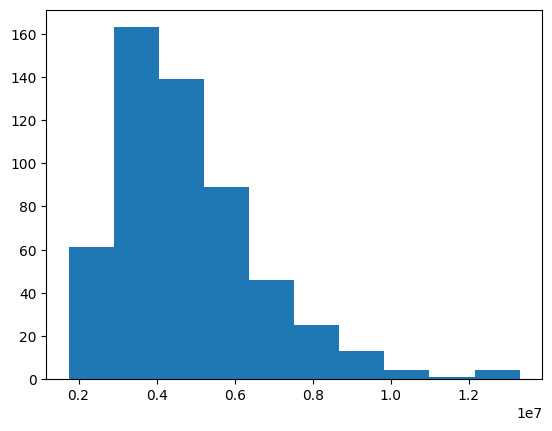

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

y=(data_set.price)


plt.hist(y)
plt.show()

# Scatter plot area vs price

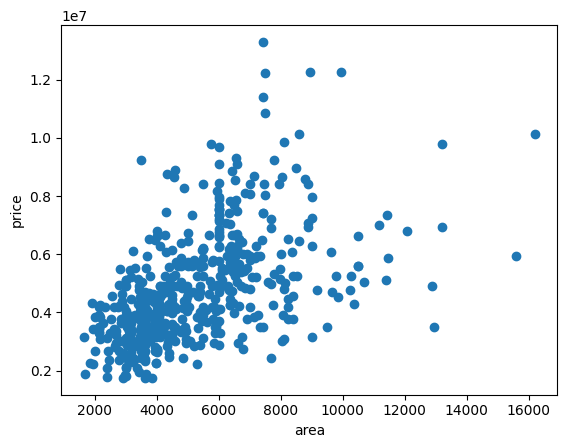

In [ ]:

x=(data_set.area)
y=(data_set.price)

plt.scatter(x, y)
plt.xlabel("area")
plt.ylabel("price")
plt.show()

# ANALYSIS OF THE DATA

<Axes: xlabel='area', ylabel='price'>

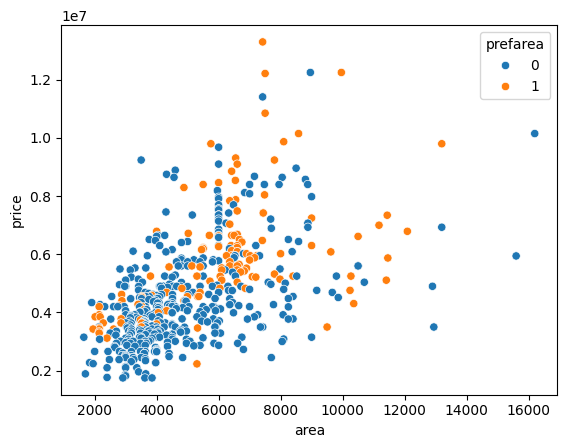

In [ ]:
sns.scatterplot(x="area",y="price",hue="prefarea",data=data_set)

<Axes: xlabel='area', ylabel='price'>

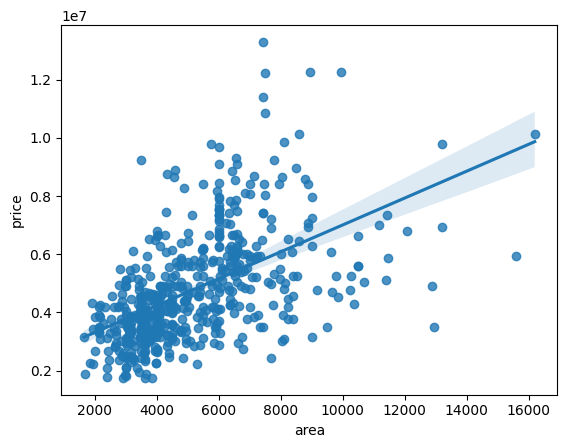

In [ ]:
sns.regplot(x="area",y="price",data=data_set)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(0)
data_set_train, data_set_test = train_test_split(data_set, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
print(data_set_train)

       price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
359  3710000  3600         3          1        1         1          0   
19   8855000  6420         3          2        2         1          0   
159  5460000  3150         3          2        1         1          1   
35   8080940  7000         3          2        4         1          0   
28   8400000  7950         5          2        2         1          0   
..       ...   ...       ...        ...      ...       ...        ...   
526  2310000  3180         2          1        1         1          0   
53   7350000  5150         3          2        4         1          0   
350  3780000  3420         2          1        2         1          0   
79   6650000  6000         3          2        3         1          1   
520  2450000  7700         2          1        1         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
359         0                0                0      

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

data_set_train[num_vars] = scaler.fit_transform(data_set_train[num_vars])

In [ ]:
data_set_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,False,True
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,True,False
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,False,False
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,False,False
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,False,True


In [ ]:
data_set_train.describe()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_train = data_set_train.pop('price')
X_train = data_set_train



# Recursive feature elimination


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
rfe = RFE(estimator=lm, n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 2),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 3),
 ('guestroom', False, 5),
 ('basement', False, 7),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 4),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 6)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

In [ ]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'parking',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [ ]:
X_train_rfe = X_train[col]

In [ ]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     106.7
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           6.98e-78
Time:                        16:32:28   Log-Likelihood:                 353.86
No. Observations:                 381   AIC:                            -693.7
Df Residuals:                     374   BIC:                            -666.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0659      0.010     

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif= pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.24
5,airconditioning,1.20
2,bathrooms,1.16
3,stories,1.16
1,area,1.15
6,prefarea,1.10
4,hotwaterheating,1.06


In [ ]:
y_train_price = lm.predict(X_train_rfe)

In [ ]:
res = (y_train_price - y_train)

In [ ]:
%matplotlib inline

<ipython-input-65-2579f8d348ce>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_price), bins = 20)


Text(0.5, 0, 'Errors')

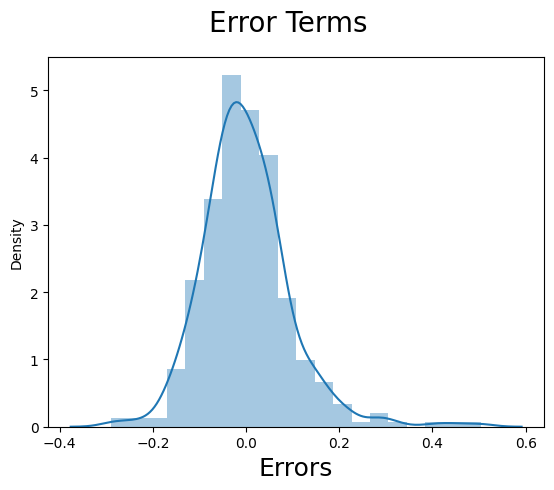

In [ ]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

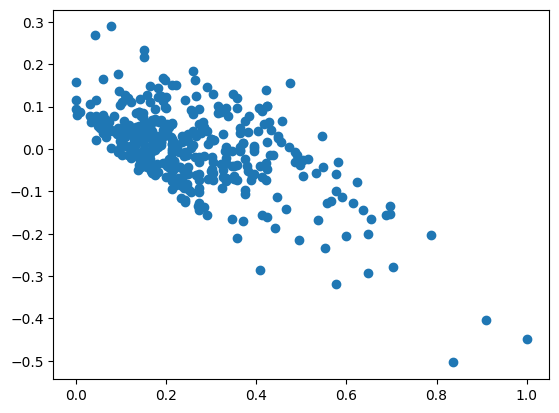

In [ ]:
plt.scatter(y_train,res)
plt.show()

In [ ]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [ ]:
data_set_test[num_vars] = scaler.fit_transform(data_set_test[num_vars])


In [ ]:
y_test = data_set_test.pop('price')
X_test = data_set_test

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
X_test_rfe = X_test[X_train_rfe.columns]
y_pred = lm.predict(X_test_rfe)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5350445027578827

Text(0, 0.5, 'y_pred')

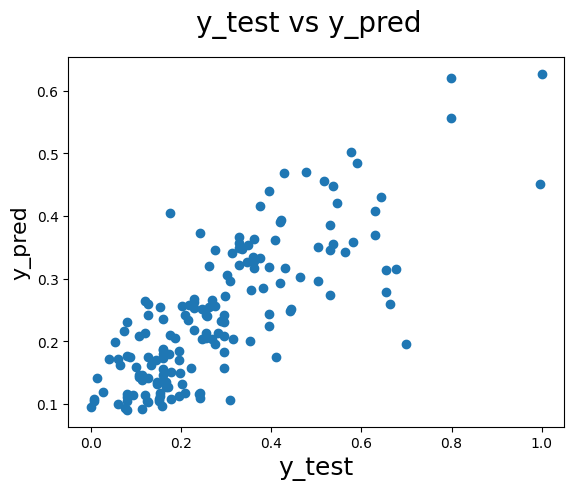

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)